In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [103]:
px = 14
py = 9
#c = 6
c = px*py - 4
ty = 11
tx = 15
Ly = 1
Lx = 10
epsx = Ly/(4*py)
epsy = Ly/(2*py)

N = (px-2)*(py - 2)
M_4x = px - 2
M_4y = py - 2
M = 2* M_4x + 2* M_4y
a = 2
b = 1

weights_polynomials = np.random.rand(3*2,1).reshape(-1,1)/(2*(N+M))

weights_RBF= 0*np.random.rand(2*(N+M),1).reshape(-1,1)/(2*(N+M))
weights_NS = np.concatenate((weights_RBF,weights_polynomials),axis=0)
weights3 = 1*np.random.rand(3*(N+M),1).reshape(-1,1)/(1*(N+M))
#weights3 = np.ones_like(weights)
#wx = weights3[:(N+M)].reshape(-1,1)
#wy = weights3[(N+M):2*(N+M)].reshape(-1,1)
#wp = weights3[2*(N+M):3*(N+M)].reshape(-1,1)
#weights3 /= np.sum(weights3)
rho = 1.0
mu = 1.0
vm = 1.0
Re = 1.0#Ly*vm*rho/mu
pm = 10
Eu = 1 #pm /(rho*vm**2) 
#weights3[:2*(N+M)] = resultado2.x.reshape(-1,1)
N+M
weights_RBF.shape
weights_NS.shape

(250, 1)

In [104]:
def euclidian_distance(x,y,xyk,c):
    matrix = np.zeros([len(x)*len(y) ,c])
    number_matrix = np.zeros([len(x)*len(y),2])
    for i in range(0,len(x)):
        for j in range(0,len(y)):
            n = i
            m = j + i*len(y)
            matrix[m,:] = np.sqrt(np.square(x[n]- xyk[:,0])  + np.square(y[j] - xyk[:,1])) + (2.2250738585072014e-308)**(1/(2*a))
            number_matrix[m,0] = x[n]
            number_matrix[m,1] = y[j]
    return matrix, number_matrix

def points(x,y):
    matrix = np.zeros([len(x)*len(y),2])
    boundary = np.zeros([2*len(y)-4 + 2 * len(x),2])
    interior = np.zeros([(len(x) - 2) * (len(y)-2),2])
    h, u = 0,0
    for i in range(0,len(x)):
        for j in range(0,len(y)):
            n = i#%len(x)
            m = j + i*len(y)
            matrix[m,0] = x[n]
            matrix[m,1] = y[j]
        
            if n == 0 or n == len(x)-1 or j == 0 or j == len(y)-1:
                
                boundary[h,0] = x[n]
                boundary[h,1] = y[j]
                h+=1
            else:
                interior[u,0] = x[n]
            
                interior[u,1] = y[j]
                u+=1
    return matrix, boundary, interior

In [105]:
x = np.linspace(0,Lx,px)
y = np.linspace(0,Ly,py)

X,Y = np.meshgrid(x,y)

#Puntos internos

x_int = np.linspace(epsx,Lx - epsx,px-2)
y_int =  np.linspace(epsy,Ly - epsy,py-2)
Xin,Yin = np.meshgrid(x_int,y_int)

#Puntos en las fronteras:
xf1, yf1 = (x_int, np.zeros(1)) # f(x,0) 
X1,Y1 = np.meshgrid(xf1 , yf1)
xf2,yf2 = (x_int, np.ones(1)*Ly) # f(x,L)
X2,Y2 = np.meshgrid(xf2 , yf2)
xf3,yf3 = (np.zeros(1), y_int ) #f(0,y)
X3,Y3 = np.meshgrid(xf3 , yf3)
xf4,yf4 = (np.ones(1)*Lx,y_int) #f(L,y)
X4,Y4 = np.meshgrid(xf4,yf4)

#Centros
#x_c = np.linspace(0,Lx,px)
#y_c = np.linspace(0,Ly,py)

xk = points(x_int,y_int)[0][:,0].reshape(-1,1)
yk = points(x_int,y_int)[0][:,1].reshape(-1,1)
#c = len(x_int)
xyk1 = np.concatenate((xk,yk),axis = 1)
xykf1 = np.concatenate((xf1.reshape(-1,1), np.zeros_like(xf1).reshape(-1,1)),axis = 1)
xykf2 = np.concatenate((xf2.reshape(-1,1), np.ones_like(xf2).reshape(-1,1)*Ly),axis = 1)
xykf3 = np.concatenate((np.zeros_like(yf3).reshape(-1,1),yf3.reshape(-1,1)),axis = 1)
xykf4 = np.concatenate((np.ones_like(yf4).reshape(-1,1)*Lx,yf4.reshape(-1,1)),axis = 1)
xyk1 = np.concatenate((xyk1,xykf1,xykf2,xykf3,xykf4),axis = 0)
#xyk1 = np.delete(xyk1,[0,M_4y +1, -1, -1 - M_4y -1],axis=0)
#Puntos test
x_test = np.linspace(0,Lx,tx)
y_test = np.linspace(0,Ly,ty)
Xt,Yt = np.meshgrid(x_test,y_test)
x_vector = points(x_int,y_int)[0][:,0].reshape(-1,1)
y_vector = points(x_int,y_int)[0][:,1].reshape(-1,1)
x_vector.shape
x_v2 = euclidian_distance(x,y,xyk1,c)#[1][:,0].reshape(-1,1)
#x_v2.shape
#xyk1.shape
#bbb = points(x,y)[1]
#bbb.shape
#bbb[-1]

xyk1.shape

(122, 2)

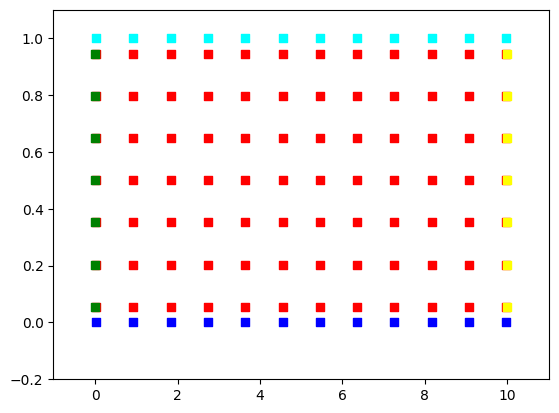

In [106]:
#Plot the colocation points
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_xlim([-0.3 - Lx/px,Lx + Lx/px + 0.3 ])
ax.set_ylim([-0.2,Ly*1.1])
ax.scatter(Xin,Yin,marker='s', color='red')
ax.scatter(X1,Y1,marker='s', color = 'blue')

ax.scatter(X2,Y2,marker='s', color = 'cyan')
ax.scatter(X3,Y3,marker='s', color = 'green')
ax.scatter(X4,Y4,marker = 's' ,color = 'yellow')
#ax.scatter(xyk1[:,0],xyk1[:,1], color = 'black')
plt.show()

In [107]:
def tps_rbf(euclidian_distance,a=a,b=b):
    #if euclidian_distance == 0:
    #    return 0
    #else:
    return (euclidian_distance*b)**(2*a) *np.log(b*euclidian_distance) #euclidian_distance + 1e-10 to avoid singularity at zero
def tpsdx(x_vector,euclidian_distance,a=a,b=b):
        return (x_vector.reshape(-1,1) - xyk1[:,0].reshape(1,-1))/euclidian_distance * (b)**(2*a) *euclidian_distance**(2*a-1)*(2*a*np.log(b*euclidian_distance) + 1)# #euclidian_distance + 1e-10 to avoid singularity at zero  
    
def tpsdy(y_vector,euclidian_distance,a=a,b=b):
        return (b)**(2*a) *euclidian_distance**(2*a-1)*(2*a*np.log(b*euclidian_distance) + 1) /(euclidian_distance) * (y_vector.reshape(-1,1) - xyk1[:,1].reshape(1,-1)) #euclidian_distance + 1e-10 to avoid singularity at zero
def tpsdxx(x_vector,euclidian_distance,a=a,b=b):
        return ((euclidian_distance**2 - (x_vector.reshape(-1,1) - xyk1[:,0].reshape(1,-1))**2)/euclidian_distance**3 * (b)**(2*a) *euclidian_distance**(2*a-1)*(2*a*np.log(b*euclidian_distance) + 1)
                        + ((x_vector.reshape(-1,1) - xyk1[:,0].reshape(1,-1))/euclidian_distance) **2 * b**(2*a) *euclidian_distance**(2*a-2) *((2*a-1)* (2*a*np.log(b*euclidian_distance) + 1) + 2*a))

def tpsdyy(y_vector,euclidian_distance,a=a,b=b):
        return ((euclidian_distance**2 - (y_vector.reshape(-1,1) - xyk1[:,1].reshape(1,-1))**2)/euclidian_distance**3 * (b)**(2*a) *euclidian_distance**(2*a-1)*(2*a*np.log(b*euclidian_distance ) + 1)
                        + ((y_vector.reshape(-1,1) - xyk1[:,1].reshape(1,-1))/euclidian_distance) **2 * b**(2*a) *euclidian_distance**(2*a-2) *((2*a-1)* (2*a*np.log(b*euclidian_distance) +1) +2*a))
  

In [108]:
euclidian_dist_complete = euclidian_distance(x,y,xyk1,c)[0]
euclidian_dist_int = euclidian_distance(x_int,y_int,xyk1,c)[0]
euclidian_dist_centers = euclidian_distance(xyk1[:,0],xyk1[:,1],xyk1,c)[0]



euclidian_dist_border1 = euclidian_distance(xf1,yf1,xyk1,c)[0]
euclidian_dist_border2 = euclidian_distance(xf2,yf2,xyk1,c)[0]
euclidian_dist_border3 = euclidian_distance(xf3,yf3,xyk1,c)[0]
euclidian_dist_border4 = euclidian_distance(xf4,yf4,xyk1,c)[0]

euclidian_dist_test = euclidian_distance(x_test,y_test,xyk1,c)[0]
#euclidian_distance(x_int,y_int,xyk1,c)[1]

In [109]:
x_vector_int = euclidian_distance(x_int,y_int,xyk1,c)[1][:,0]
y_vector_int = euclidian_distance(x_int,y_int,xyk1,c)[1][:,1]

In [110]:
gxx_int = (tpsdxx(x_vector_int,euclidian_dist_int)) 
gyy_int =  (tpsdyy(y_vector_int,euclidian_dist_int)) 
gx_int = (tpsdx(x_vector_int,euclidian_dist_int)) 
gy_int = tpsdy(y_vector_int,euclidian_dist_int)
g_int = tps_rbf(euclidian_dist_int)
gx_b4 = tpsdx(np.ones_like(yf4)*Lx,euclidian_dist_border4 )
gy_b4 = tpsdy(yf4,euclidian_dist_border4)
gxx_b4 = tpsdxx(np.ones_like(yf4)*Lx,euclidian_dist_border4)
gyy_b4 = tpsdyy(yf4,euclidian_dist_border4)
gb2 = tps_rbf(euclidian_dist_border2)
gb3 = tps_rbf(euclidian_dist_border3)
gxx_b3 = tpsdxx(np.zeros_like(yf3),euclidian_dist_border3)
gyy_b3 = tpsdyy(yf3,euclidian_dist_border3)
gx_b3 = tpsdx(np.zeros_like(yf3),euclidian_dist_border3)
gy_b3 = tpsdy(yf3,euclidian_dist_border3)

gb1 = tps_rbf(euclidian_dist_border1)
gb4 = tps_rbf(euclidian_dist_border4)

gxx_b2 = tpsdxx(xf2,euclidian_dist_border2)
gxx_b1 = tpsdxx(xf1,euclidian_dist_border1)
gyy_b2 = tpsdyy(np.ones_like(xf2)*Ly,euclidian_dist_border2)
gyy_b1 = tpsdyy(np.zeros_like(xf1),euclidian_dist_border1)

gy_b2 = tpsdy(np.ones_like(xf2)*Ly,euclidian_dist_border2)
gy_b1 = tpsdy(np.zeros_like(xf1),euclidian_dist_border1)

In [ ]:

p1 = np.ones_like(x_vector_int).reshape(-1,1)
p2 = x_vector_int.reshape(-1,1)
p3 = y_vector_int.reshape(-1,1)
p4 = x_vector_int.reshape(-1,1)*y_vector_int.reshape(-1,1)
p5 = y_vector_int.reshape(-1,1)*y_vector_int.reshape(-1,1)
p6 = x_vector_int.reshape(-1,1)*x_vector_int.reshape(-1,1)

p1_w = np.ones_like(xf1).reshape(-1,1)
p2_w = xf1.reshape(-1,1)

p1_in = np.ones_like(yf3).reshape(-1,1)
p2_in = yf3.reshape(-1,1)



g_int_p = np.concatenate((g_int,p1,p2,p3,p4,p5,p6),axis = 1)
gx_int_p = np.concatenate((gx_int, 0*p1, p1, 0*p3,p3,0*p5,2*p2),axis = 1)
gy_int_p = np.concatenate((gy_int, 0*p1, 0*p2, np.ones_like(y_vector_int).reshape(-1,1),p2,2*p3,0*p6 ),axis = 1)
gxx_int_p = np.concatenate((gxx_int, 0*p1, 0*p2, 0*p3),axis = 1)
gyy_int_p = np.concatenate((gyy_int, 0*p1, 0*p2, 0*p3),axis = 1)

gb1_p = np.concatenate((gb1, p1_w, p2_w, 0*p2_w),axis = 1)
gb2_p = np.concatenate((gb2, p1_w, p2_w, Ly*p1_w),axis = 1)
gb3_p = np.concatenate((gb3, p1_in, 0*p1_in, p2_in),axis = 1)
gb4_p = np.concatenate((gb4, p1_in, Lx*p1_in, p2_in),axis = 1)


gx_b3_p = np.concatenate((gx_b3, 0*p1_in, 0*p1_in, 0*p2_in),axis = 1)
gy_b3_p = np.concatenate((gy_b3, 0*p1_in, 0*p1_in, np.ones_like(yf3).reshape(-1,1)),axis = 1)
gx_b4_p = np.concatenate((gx_b4, 0*p1_in, 0*p1_in, 0*p2_in),axis = 1)
gy_b4_p = np.concatenate((gy_b4, 0*p1_in, 0*p1_in, np.ones_like(yf4).reshape(-1,1)),axis = 1)

gxx_b1_p = np.concatenate((gxx_b1, 0*p1_w, 0*p1_w, 0*p2_w),axis = 1)
gyy_b1_p = np.concatenate((gyy_b1, 0*p1_w, 0*p1_w, 0*p2_w),axis = 1)
gxx_b2_p = np.concatenate((gxx_b2, 0*p1_w, 0*p1_w, 0*p2_w),axis = 1)
gyy_b2_p = np.concatenate((gyy_b2, 0*p1_w, 0*p1_w, 0*p2_w),axis = 1)

gxx_b3_p = np.concatenate((gxx_b3, 0*p1_in, 0*p1_in, 0*p2_in),axis = 1)
gyy_b3_p = np.concatenate((gyy_b3, 0*p1_in, 0*p1_in, 0*p2_in),axis = 1)
gxx_b4_p = np.concatenate((gxx_b4, 0*p1_in, 0*p1_in, 0*p2_in),axis = 1)
gyy_b4_p = np.concatenate((gyy_b4, 0*p1_in, 0*p1_in, 0*p2_in),axis = 1)

gyy_int_p[:,-4]


array([ 1.04321095e+03,  1.03435913e+03,  1.02712106e+03,  1.02149414e+03,
        1.01747637e+03,  1.01506628e+03,  1.01426302e+03,  8.35495806e+02,
        8.26915939e+02,  8.19901269e+02,  8.14448675e+02,  8.10555717e+02,
        8.08220643e+02,  8.07442402e+02,  6.53540333e+02,  6.45260186e+02,
        6.38491949e+02,  6.33231781e+02,  6.29476677e+02,  6.27224480e+02,
        6.26473892e+02,  4.96635514e+02,  4.88689054e+02,  4.82195509e+02,
        4.77150042e+02,  4.73548864e+02,  4.71389251e+02,  4.70669562e+02,
        3.63983130e+02,  3.56412791e+02,  3.50229403e+02,  3.45426694e+02,
        3.41999739e+02,  3.39944992e+02,  3.39260315e+02,  2.54669364e+02,
        2.47529529e+02,  2.41702054e+02,  2.37178495e+02,  2.33952195e+02,
        2.32018350e+02,  2.31374059e+02,  1.67624509e+02,  1.60987058e+02,
        1.55576605e+02,  1.51381201e+02,  1.48391371e+02,  1.46600249e+02,
        1.46003673e+02,  1.01557182e+02,  9.55206241e+01,  9.06124361e+01,
        8.68145164e+01,  

In [25]:
phidphidx_p = np.array([(g_int_p[i,:].reshape(-1,1) @ gx_int_p[i,:].reshape(-1,1).T).reshape(-1) for i in range(len(g_int_p))])
phidphidy_p = np.array([(g_int_p[i,:].reshape(-1,1) @ gy_int_p[i,:].reshape(-1,1).T).reshape(-1) for i in range(len(g_int_p))])

phidphidx_b3_p = np.array([(gb3_p[i,:].reshape(-1,1) @ gx_b3_p[i,:].reshape(-1,1).T).reshape(-1) for i in range(len(gb3_p))])
phidphidy_b3_p = np.array([(gb3_p[i,:].reshape(-1,1) @ gy_b3_p[i,:].reshape(-1,1).T).reshape(-1) for i in range(len(gb3_p))])
phidphidx_b4_p = np.array([(gb4_p[i,:].reshape(-1,1) @ gx_b4_p[i,:].reshape(-1,1).T).reshape(-1) for i in range(len(gb4_p))])
phidphidy_b4_p = np.array([(gb4_p[i,:].reshape(-1,1) @ gy_b4_p[i,:].reshape(-1,1).T).reshape(-1) for i in range(len(gb4_p))])

phidphidy_b4_p.shape


(7, 15625)

In [26]:
xyk1.shape


#P = np.concatenate((P,(xyk1[:,0]**2).reshape(-1,1)),axis = 1)
#P = np.concatenate((P,(xyk1[:,1]**2).reshape(-1,1)),axis = 1)
#P =  np.concatenate((P,(xyk1[:,1]**2).reshape(-1,1)),axis = 1)


(122, 2)

In [92]:
def NavierStokess(weightss):
    
    wx = np.concatenate((weightss[:((N+M))].reshape(-1,1), weightss[-6:-3].reshape(-1,1)), axis=0)
    wy = np.concatenate((weightss[((N+M)):2*((N+M))].reshape(-1,1), weightss[-3:].reshape(-1,1)),axis = 0)
    P = np.ones_like(xyk1[:,0]).reshape(-1,1)
    P = np.concatenate((P,xyk1),axis = 1)
    
    wxiwxj = (wx @ wx.T).T.flatten().reshape(-1,1)
    wyiwyj = (wy @ wy.T).T.flatten().reshape(-1,1)
    wxiwyj = (wx @ wy.T).T.flatten().reshape(-1,1)
    wyiwxj = (wy @ wx.T).T.flatten().reshape(-1,1)
    
    F = np.zeros(((3*N+ 4*(M_4x) + 6*(M_4y) + 6),))
    
    #Ecuaiones diferenciales en puntos internos
    #Ecuacion en x
    F[0:N] +=  Re/pm*( 1/Re*(-np.dot(gxx_int_p,wx) - np.dot(gyy_int_p,wx)) + Eu*(-10) 
                    #   + np.dot(phidphidx,wxiwxj) + np.dot(phidphidy,wyiwxj)
                       ).flatten()#/F_01.mean()
        #   Ecuacione en y
    F[N:2*N] += Re/pm*( 1/Re*(-np.dot(gxx_int_p,wy) - np.dot(gyy_int_p,wy)) 
                   #+ Eu*0 + np.dot(phidphidx,wxiwyj) + np.dot(phidphidy,wyiwyj)
                   ).flatten() #/F_02.mean()
        #Ecuacion de continuidad8u9
    F[2*N:3*N] += 2*Re*(np.dot(gx_int_p,wx) + np.dot(gy_int_p,wy)).flatten()#/F_03.mean()
    #Condiciones de frontera
    
        # Condiciones de ux
    F[3*N  : 3*N +  M_4x] = 1*( np.dot( gb2_p , wx ) ).flatten()#/F_04.mean()
    F[3*N + ( M_4x): 3*N + 2 * ( M_4x)] = 1*(np.dot(gb1_p,wx)).flatten()#/F_05.mean()
    
    
        #Condiciones de uy
    F[3*N + 2 * ( M_4x) : 3*N + 3 * ( M_4x )] = 1*(np.dot(gb2_p,wy)).flatten()#/F_07.mean()
    F[3*N + 3 * ( M_4x ):3*N + 4 * ( M_4x ) ] = 1*(np.dot(gb1_p,wy)).flatten()#/F_08.mean()

    #Ecuaciones diferenciales en las fronteras
        #Ecuaciones en frontera de salida
    F[ 3*N + 4 * ( M_4x ) :  3*N + 4 * ( M_4x ) + (M_4y)] = 2*Re*(np.dot(gx_b4_p,wx) + np.dot(gy_b4_p,wy)).flatten()#/F_011.mean()
    F[3*N + 4 * ( M_4x ) + 1 * (M_4y):3*N + 4 * ( M_4x ) + 2 * (M_4y)] = Re/pm*( 1/Re*(-np.dot(gxx_b4_p,wx) - np.dot(gyy_b4_p,wx)) + Eu*(-10) 
                                                                                # + np.dot(phidphidx_b4,wxiwxj) + np.dot(phidphidy_b4,wyiwxj)
                                                                                 ).flatten()#/F_013.mean()
    F[3*N + 4 * ( M_4x ) + 2 * (M_4y):3*N + 4 * ( M_4x ) + 3 * (M_4y) ] = Re/pm*( 1/Re*(-np.dot(gxx_b4_p,wy) - np.dot(gyy_b4_p,wy)) 
                                                                            # + np.dot(phidphidx_b4,wxiwyj) + np.dot(phidphidy_b4,wyiwyj) 
                                                                             ).flatten()#/F_014.mean()
    F[3*N + 4 * ( M_4x ) + 3 * (M_4y):3*N + 4 * ( M_4x ) + 4 * (M_4y)] = Re/pm*( 1/Re*(-np.dot(gxx_b3_p,wy) - np.dot(gyy_b3_p,wy)) 
                                                                            #+ np.dot(phidphidx_b3,wxiwyj) + np.dot(phidphidy_b3,wyiwyj) 
                                                                            ).flatten()#/F_015.mean()
    F[3*N + 4 * ( M_4x ) + 4 * (M_4y):3*N + 4 * ( M_4x ) + 5 * (M_4y)] = Re/pm*( 1/Re*(-np.dot(gxx_b3_p,wx) - np.dot(gyy_b3_p,wx)) + Eu*(-10)
                                                                                # + np.dot(phidphidx_b3,wxiwxj) + np.dot(phidphidy_b3,wyiwxj)
                                                                                 ).flatten()#/F_013.mean()
    F[3*N + 4 * ( M_4x ) + 5 * (M_4y):3*N + 4 * ( M_4x ) + 6 * (M_4y)] = 2*Re*(np.dot(gx_b3_p,wx) + np.dot(gy_b3_p,wy)).flatten()
    F[3*N + 4 * ( M_4x ) + 6 * (M_4y):3*N + 4 * ( M_4x ) + 6 * (M_4y) + 3] = 2*Re*(np.dot(P.T,wx[:(N+M)])).flatten()
    F[3*N + 4 * ( M_4x ) + 6 * (M_4y) + 3:3*N + 4 * ( M_4x ) + 6 * (M_4y) + 6] = 2*Re*(np.dot(P.T,wy[:(N+M)])).flatten()
    
    
    
    return 1/Re*F#,F.shape
    
    

In [93]:
wx = np.concatenate((weights_NS[:((N+M))].reshape(-1,1), weights_NS[-6:-3]), axis=0)
wy = np.concatenate((weights_NS[((N+M)):2*((N+M))].reshape(-1,1), weights_NS[-3:]),axis = 0)
#np.dot(P.T,wy[:(N+M)])
wx

array([[0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.   

In [94]:

len(NavierStokess(weights_NS))

348

In [95]:
from scipy.optimize import approx_fprime
from numpy.linalg import cond, norm
Re = 1
x0 = weights_NS.reshape(-1)
def residual_func(w):
    return NavierStokess(w)

# Use finite differences to approximate Jacobian
epsilon = np.sqrt(np.finfo(float).eps)
len(residual_func(x0))
J = np.zeros((len(residual_func(x0)), len(x0)))
#print(epsilon)
for i in range(len(x0)):
    e = np.zeros_like(x0)
    e[i] = epsilon
    J[:, i] = (residual_func(x0 + e) - residual_func(x0)) / epsilon

condition_number = cond(J)
print("Jacobian condition number:", condition_number)

Jacobian condition number: 1186800041.9708955


In [96]:
from scipy.optimize import least_squares
Re = 1000

# Define el vector inicial
x0 = 1*(weights_NS.reshape(-1) ) # tamaño_total = tamaño del vector weights
print( NavierStokess(weights3).shape[0] >= x0.shape[0])
# Llamas al solucionador
resultado2 = least_squares(NavierStokess, x0, method='trf', verbose = 2) 

True
   Iteration     Total nfev        Cost      Cost reduction    Step norm     Optimality   
       0              1         4.9004e+01                                    5.32e+03    
       1              2         4.8995e+01      9.87e-03       5.25e-03       9.65e-02    
       2              3         4.8991e+01      3.67e-03       1.05e-02       4.75e-02    
       3              4         4.8984e+01      6.89e-03       2.10e-02       4.52e-02    
       4              5         4.8971e+01      1.32e-02       4.20e-02       4.26e-02    
       5              6         4.8946e+01      2.47e-02       8.40e-02       6.65e-02    
       6              7         4.8902e+01      4.42e-02       1.68e-01       2.52e-01    
       7              8         4.8827e+01      7.43e-02       3.36e-01       8.72e-01    
       8              9         4.8706e+01      1.21e-01       6.72e-01       5.18e-01    
       9             10         4.8496e+01      2.10e-01       1.34e+00       2.82e+0

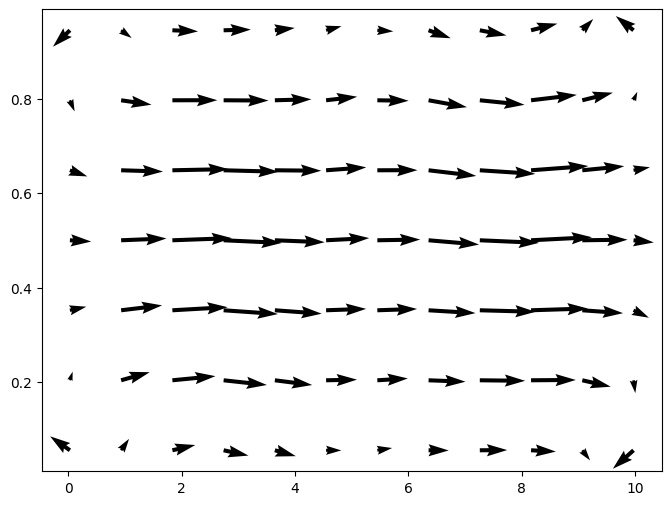

In [99]:
ux2 = tps_rbf(euclidian_dist_int) @ resultado2.x[:N+M]
uy2 = tps_rbf(euclidian_dist_int) @ resultado2.x[N+M:2*(N+M)]
#p3 = tps_rbf(euclidian_dist_int) @ resultado3.x[2*(N+M):3*(N+M)]
fig, ax = plt.subplots(1, 1, figsize=(8,6))
ax.quiver(Xin, Yin, ux2.reshape(px-2,py-2).T, uy2.reshape(px-2,py-2).T)

771.9765013267988

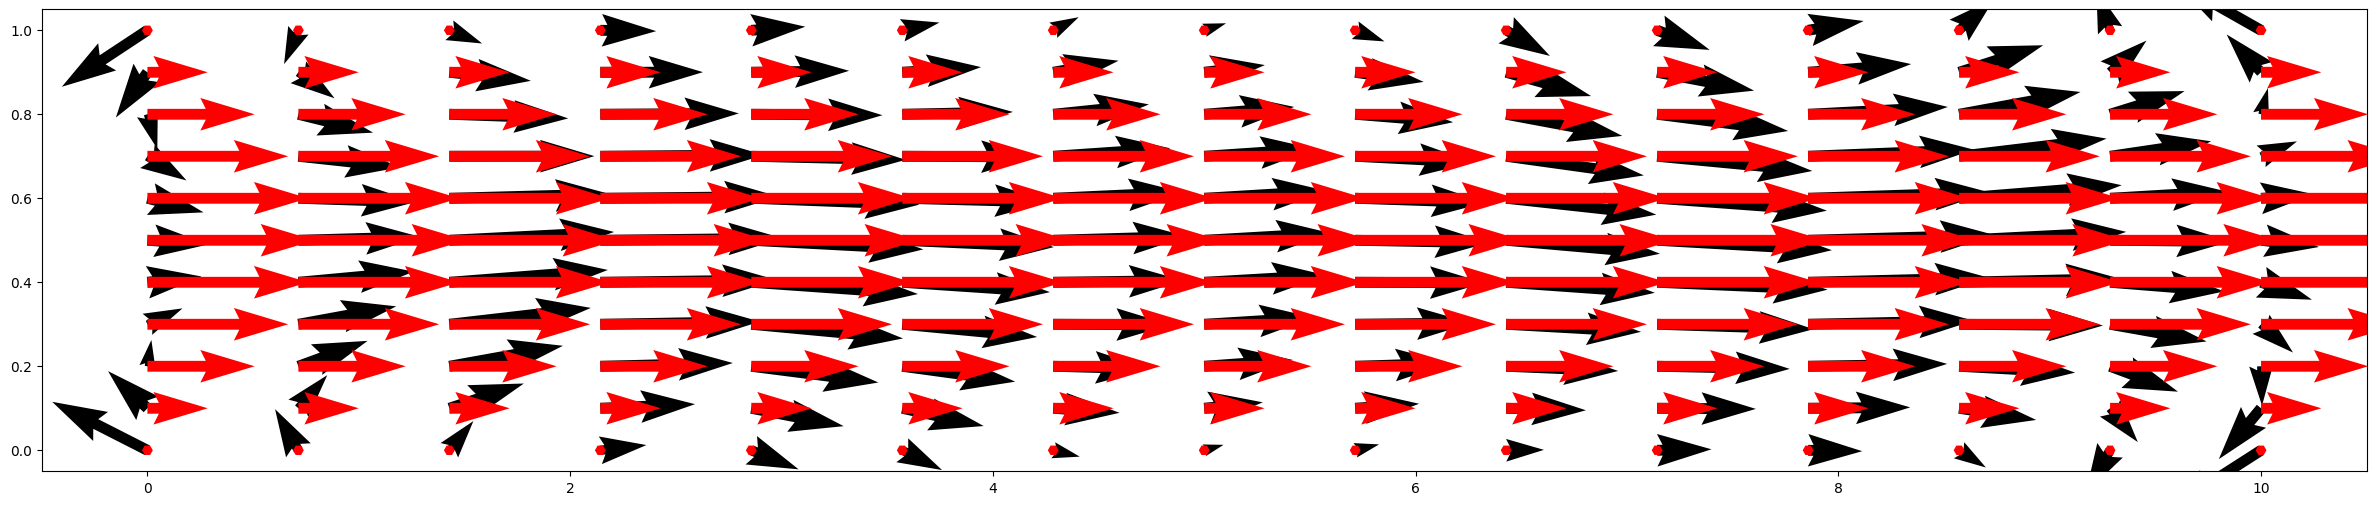

In [100]:
ux2 = tps_rbf(euclidian_dist_test) @ resultado2.x[:N+M]
uy2 = tps_rbf(euclidian_dist_test) @ resultado2.x[N+M:2*(N+M)]
#p3 = tps_rbf(euclidian_dist_test) @ resultado3.x[2*(N+M):3*(N+M)]
#print(np.max(uy2))
fig, ax = plt.subplots(1, 1, figsize=(30,6))
ax.quiver(Xt, Yt, ux2.reshape(tx,ty).T, uy2.reshape(tx,ty).T)
ax.quiver(Xt, Yt, -5*Re*(Yt**2 - Ly*Yt), 0, color = 'red')
np.max(ux2)

ERROR Medio: 30.120851666988145 %
Error Maximo 42.13068246030336 %
V numérico maximo 637.366469246208
V analitico maximo 1250.0
Error medio total 34.78007381848693 %


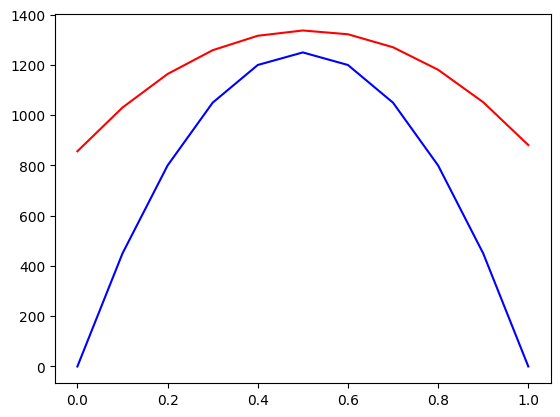

In [101]:
ppp = 9
print("ERROR Medio:",np.mean( np.abs((ux2.reshape(tx,ty).T[1:-1,ppp]+ 86 - (-5*Re*(y_test**2 - Ly*y_test))[1:-1] ) /(-5*Re*(y_test**2 - Ly*y_test)   )[1:-1]  ) ) *100,'%')
print("Error Maximo", np.max( np.abs((ux2.reshape(tx,ty).T[1:-1,ppp]+ 86 - (-5*Re*(y_test**2 - Ly*y_test))[1:-1] ) /(-5*Re*(y_test**2 - Ly*y_test)   )[1:-1]  ) ) *100,'%')
print("V numérico maximo", np.max(ux2.reshape(tx,ty).T[1:-1,ppp] ))
print("V analitico maximo", np.max(-Re*5*(y_test**2 - Ly*y_test)[1:-1]))
e = np.mean([np.mean( np.abs((ux2.reshape(tx,ty).T[1:-1,i]+ 86 - (-5*Re*(y_test**2 - Ly*y_test))[1:-1] ) /(-5*Re*(y_test**2 - Ly*y_test)   )[1:-1]  ) ) *100 for i in range(1,ty-1)])
print("Error medio total",e, "%")
plt.plot(y_test,ux2.reshape(tx,ty).T[:,ppp] + 700, color = 'red')
plt.plot(y_test,-Re*5*(y_test**2 - Ly*y_test), color = 'blue')